In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!pip install umap-learn
from umap import UMAP

In [41]:
import torch
from torch.utils.data import DataLoader
import pickle

data = pd.read_pickle("balanced_vectorized.pkl").sample(frac=0.25)

In [75]:
data.head()

,character,text,vector,goodness,priority,if_dead
970,tom,"Ah, Hagrid! The usual, I presume?\nBless my so...","[-0.0726442, 0.46006417, 0.18889366, 0.4122778...",Bad,2,Dead
1857,argus filch,"Anyone here, my sweet? Come on.\nWho's there?...","[0.2272414, -0.10367466, 0.10784524, 0.2942688...",Bad,2,Undead
1929,voldemort,It belongs to me! I killed Snape!,"[-0.24642326, 0.14405234, -0.25892344, -0.0855...",Bad,2,Dead
2498,mundungus fletcher,"Well, she's right there, in't she? Bleedin' bo...","[0.40461987, -0.16313602, 0.11044888, 0.221936...",Neutral,1,Else
211,rubeus hagrid,"Well, there's your money, Harry. Gringotts, t...","[-0.09787298, 0.39072463, -0.046341974, 0.0098...",Good,2,Undead


In [42]:
vectors = data['vector'].tolist()

In [43]:
characters = data['character'].tolist()


In [44]:
goodness = data['goodness'].tolist()


In [56]:
priorities = data['priority'].tolist()

In [58]:
status = data['if_dead'].tolist()

In [45]:
umaped_vct = UMAP().fit_transform(vectors)

Good = blue, Neutral = orange, Bad = green, Trash = red

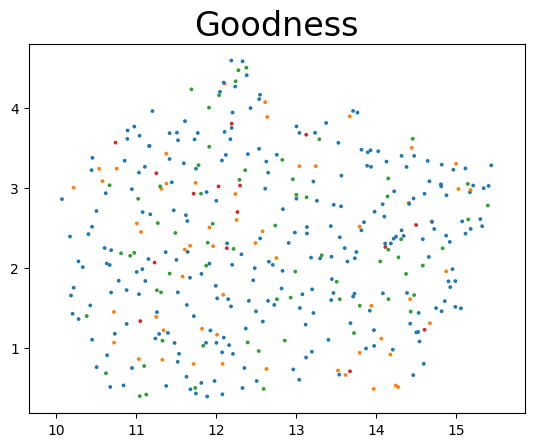

In [71]:
ax = plt.scatter(
    umaped_vct[:, 0],
    umaped_vct[:, 1],
    c=[sns.color_palette()[x] for x in data.goodness.map({"Good":0, "Neutral":1, "Bad":2, "Trash":3})],
    s=3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Goodness', fontsize=24);

# for i, x, y in zip(characters, umaped_vct[:, 0], umaped_vct[:, 1]):
#     plt.text(x, y, i)

0 = blue, 1 = orange, 2 = green, 3 = red

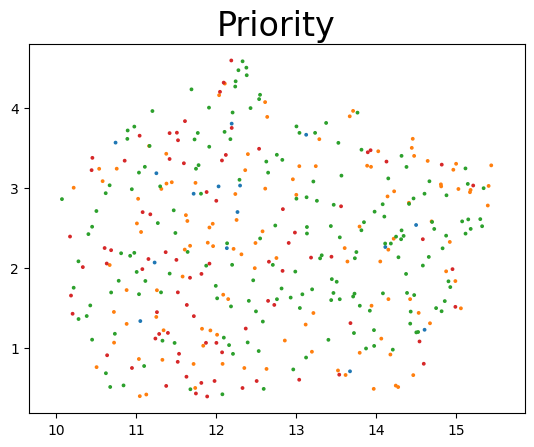

In [76]:
ax2 = plt.scatter(
    umaped_vct[:, 0],
    umaped_vct[:, 1],
    c=[sns.color_palette()[x] for x in data.priority],
    s=3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Priority', fontsize=24);
# for i, x, y in zip(priorities, umaped_vct[:, 0], umaped_vct[:, 1]):
#     plt.text(x, y, i)

Dead = blue, Undead = orange, Else = green, Trash = red

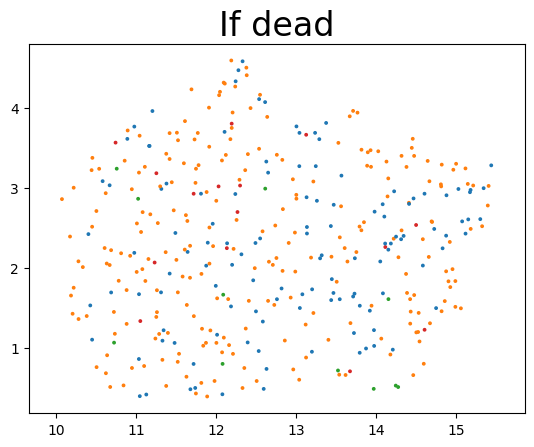

In [74]:
ax3 = plt.scatter(
    umaped_vct[:, 0],
    umaped_vct[:, 1],
    c=[sns.color_palette()[x] for x in data.if_dead.map({"Dead":0, "Undead":1, "Else": 2, "Trash":3})],
    s=3)
plt.gca().set_aspect('equal', 'datalim')
plt.title('If dead', fontsize=24);
# for i, x, y in zip(status, umaped_vct[:, 0], umaped_vct[:, 1]):
#     plt.text(x, y, i)